<a href="https://colab.research.google.com/github/hari431996/my_labs/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following notebook, is for CIFAR 10 dataset. with various techniques like batch normalisation , and different types of activation functions.

In [ ]:
#imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#importing datasets
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 5s 0us/step


In [ ]:
#Data preprocessing
x_train , x_test = x_train/255, x_test/255
y_train = y_train.flatten()
y_test = y_test.flatten()
x_train.shape[1:]

(32, 32, 3)

In [ ]:
#building the model with early stopping call backs and nadam optimiser
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32,32,3]))
for _ in range(20):
  model.add(tf.keras.layers.Dense(100, activation='elu',kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
#compiling the model
opti = tf.keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(optimizer=opti, loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
#fitting the model 
early_stop = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint("cifar_10_model.h5", save_best_only=True)
r = model.fit(x_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stop, checkpoint])
model = tf.keras.models.load_model("cifar_10_model.h5")
model.evaluate(x_test, y_test)

Epoch 1/100
1250/1250 [==============================] - 17s 13ms/step - loss: 1.7598 - accuracy: 0.3631 - val_loss: 1.7278 - val_accuracy: 0.3821
Epoch 2/100
1250/1250 [==============================] - 17s 13ms/step - loss: 1.6678 - accuracy: 0.3972 - val_loss: 1.6795 - val_accuracy: 0.3967
Epoch 3/100
1250/1250 [==============================] - 17s 14ms/step - loss: 1.6026 - accuracy: 0.4218 - val_loss: 1.6361 - val_accuracy: 0.4110
Epoch 4/100
1250/1250 [==============================] - 18s 15ms/step - loss: 1.5507 - accuracy: 0.4402 - val_loss: 1.5910 - val_accuracy: 0.4304
Epoch 5/100
1250/1250 [==============================] - 17s 14ms/step - loss: 1.5085 - accuracy: 0.4607 - val_loss: 1.5565 - val_accuracy: 0.4424
Epoch 6/100
1250/1250 [==============================] - 17s 14ms/step - loss: 1.4736 - accuracy: 0.4706 - val_loss: 1.5447 - val_accuracy: 0.4536
Epoch 7/100
1250/1250 [==============================] - 17s 14ms/step - loss: 1.4439 - accuracy: 0.4829 - val_loss: 1

[1.4425958395004272, 0.4869000017642975]

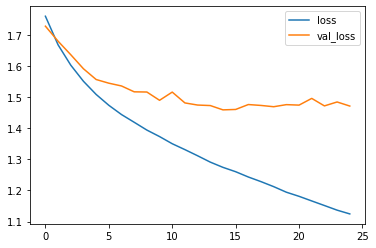

In [ ]:
#plotting the loss and val_loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

The training loss, is decreasing with the epochs but, the validation loss remains constant after the first 5 epochs.

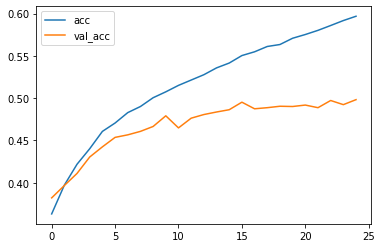

In [ ]:
#plotting the accuracy and val_accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

The training accuray, is increasing with the epochs but, the valid remains constant after the first 5 epochs.

Building anothe model with Batch normalisation , to see if there is an improvement in performance.

In [ ]:
#building the model with a batch normalisation layer before activation
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32,32,3]))
model.add(tf.keras.layers.BatchNormalization())
for _ in range(20):
  model.add(tf.keras.layers.Dense(units=100, kernel_initializer='he_normal'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))


In [ ]:
 model.compile(optimizer=opti, loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stop])
model.evaluate(x_test, y_test)

Epoch 1/100
1250/1250 [==============================] - 28s 23ms/step - loss: 1.6247 - accuracy: 0.4216 - val_loss: 1.5572 - val_accuracy: 0.4427
Epoch 2/100
1250/1250 [==============================] - 27s 21ms/step - loss: 1.5839 - accuracy: 0.4362 - val_loss: 1.5227 - val_accuracy: 0.4531
Epoch 3/100
1250/1250 [==============================] - 27s 21ms/step - loss: 1.5497 - accuracy: 0.4470 - val_loss: 1.5074 - val_accuracy: 0.4617
Epoch 4/100
1250/1250 [==============================] - 27s 22ms/step - loss: 1.5193 - accuracy: 0.4594 - val_loss: 1.4827 - val_accuracy: 0.4713
Epoch 5/100
1250/1250 [==============================] - 28s 22ms/step - loss: 1.4971 - accuracy: 0.4664 - val_loss: 1.4594 - val_accuracy: 0.4794
Epoch 6/100
1250/1250 [==============================] - 27s 22ms/step - loss: 1.4712 - accuracy: 0.4754 - val_loss: 1.4639 - val_accuracy: 0.4782
Epoch 7/100
1250/1250 [==============================] - 25s 20ms/step - loss: 1.4490 - accuracy: 0.4840 - val_loss: 1

[1.4000872373580933, 0.5123999714851379]

Looks like there is not much improvement in loss , even after using Batch normalisation and also the convergence rate is same as before

Replacing Batch normalisation with SELU.

In [ ]:
#model with selu activation
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32,32,3]))
for _ in range(20):
  model.add(tf.keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=opti, loss = tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

#scaling x_train and x_test
x_train_mean = x_train.mean(axis=0)
x_train_std = x_train.std(axis=0)
x_test_mean = x_test.mean(axis=0)
x_test_std = x_test.std(axis=0)
x_train_scaled = (x_train - x_train_mean)/x_train_std
x_test_scaled = (x_test - x_train_mean)/x_test_std
model.fit(x_train_scaled, y_train, epochs=100, validation_split=0.2, callbacks=[early_stop])
model.evaluate(x_test_scaled, y_test)

Epoch 1/100
1250/1250 [==============================] - 21s 14ms/step - loss: 1.9601 - accuracy: 0.2971 - val_loss: 1.6993 - val_accuracy: 0.3927
Epoch 2/100
1250/1250 [==============================] - 17s 14ms/step - loss: 1.6299 - accuracy: 0.4169 - val_loss: 1.6120 - val_accuracy: 0.4315
Epoch 3/100
1250/1250 [==============================] - 18s 14ms/step - loss: 1.5120 - accuracy: 0.4586 - val_loss: 1.5916 - val_accuracy: 0.4313
Epoch 4/100
1250/1250 [==============================] - 18s 14ms/step - loss: 1.4368 - accuracy: 0.4887 - val_loss: 1.5608 - val_accuracy: 0.4493
Epoch 5/100
1250/1250 [==============================] - 18s 14ms/step - loss: 1.3797 - accuracy: 0.5080 - val_loss: 1.5490 - val_accuracy: 0.4564
Epoch 6/100
1250/1250 [==============================] - 18s 14ms/step - loss: 1.3296 - accuracy: 0.5281 - val_loss: 1.5390 - val_accuracy: 0.4644
Epoch 7/100
1250/1250 [==============================] - 17s 14ms/step - loss: 1.2829 - accuracy: 0.5426 - val_loss: 1

[1.4874615669250488, 0.4844000041484833]

Looks like the model accuracy has dropped when compared to Batch normalisatiion from 0.51 to 0.48, but this model with selu activation converges faster and the average time for each epoch is 15s which is way less.

Adding alphadropout, to see if the model performance improves.

In [ ]:
#model with alphadroput
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(32,32,3)))
for _ in range(20):
  model.add(tf.keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'))
model.add(tf.keras.layers.AlphaDropout(0.1))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#compiling the model 
model.compile(optimizer = opti, loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
early_stop = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
#normalising the data
x_train_mean = x_train.mean()
x_train_std = x_train.std()
x_train_scaled = (x_train - x_train_mean)/x_train_std

x_test_mean = x_test.mean()
x_test_std = x_test.std()
x_test_scaled = (x_test - x_test_mean)/x_test_std

#fitting the data

model.fit(x_train_scaled, y_train, epochs=100, validation_split=0.2, callbacks=[early_stop])
model.evaluate(x_test_scaled, y_test)


Epoch 1/100
1250/1250 [==============================] - 18s 12ms/step - loss: 2.2085 - accuracy: 0.2407 - val_loss: 1.7751 - val_accuracy: 0.3746
Epoch 2/100
1250/1250 [==============================] - 15s 12ms/step - loss: 1.7729 - accuracy: 0.3744 - val_loss: 1.6562 - val_accuracy: 0.4229
Epoch 3/100
1250/1250 [==============================] - 15s 12ms/step - loss: 1.6208 - accuracy: 0.4246 - val_loss: 1.6247 - val_accuracy: 0.4445
Epoch 4/100
1250/1250 [==============================] - 15s 12ms/step - loss: 1.5150 - accuracy: 0.4607 - val_loss: 1.5919 - val_accuracy: 0.4520
Epoch 5/100
1250/1250 [==============================] - 15s 12ms/step - loss: 1.4580 - accuracy: 0.4838 - val_loss: 1.5789 - val_accuracy: 0.4613
Epoch 6/100
1250/1250 [==============================] - 15s 12ms/step - loss: 1.3862 - accuracy: 0.5081 - val_loss: 1.5705 - val_accuracy: 0.4685
Epoch 7/100
1250/1250 [==============================] - 15s 12ms/step - loss: 1.3472 - accuracy: 0.5177 - val_loss: 1

[1.522856593132019, 0.4823000133037567]

The model performance hasnt imporved much when compared to the previous one but, it has converged faster within 18 epochs.